In [2]:

# import all the required libraries

import pandas as pd
import numpy as np


# for visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# for linear regression
from sklearn import datasets #
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score #to split the dataset into training, testing & validation
from sklearn.metrics import mean_squared_error # to calculate the error rate of the model(performance)#mse #performance of the model

In [3]:
# loading the dataset
df = pd.read_csv(r'../ai\Boston_Housing_Dataset.csv')
df.head(2)

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.9,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14,21.6


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  B           506 non-null    float64
 13  LSTAT       506 non-null    float64
 14  PRICE       506 non-null    float64
dtypes: float64(14), int64(1)
memory usage: 59.4 KB


In [5]:
df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


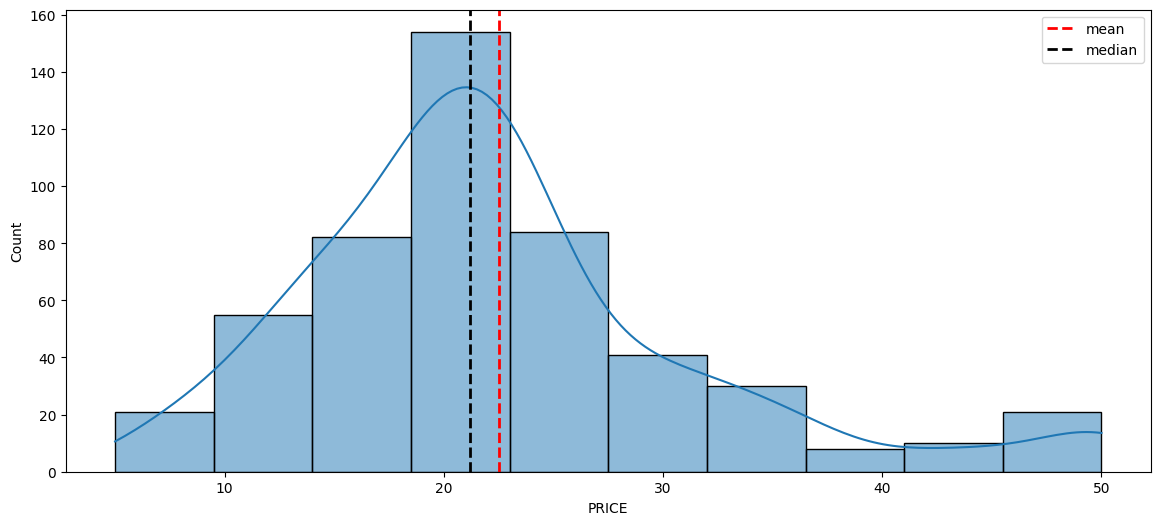

In [6]:
# Now, we plot a histogram of the 'PRICE' column because we want to creat a linear regression model to predict the prices.
plt.subplots(figsize = (14, 6))

sns.histplot(df['PRICE'], bins = 10, kde = True)
# kde creates a Kernal Density Estimate 

# plotting a mean line
plt.axvline(df['PRICE'].mean(), linestyle = 'dashed', color = 'red', label = 'mean', linewidth = '2')
# axvline() creates a vertical line in the graph

# plotting a median line
plt.axvline(df['PRICE'].median(), linestyle = 'dashed', color = 'black', label = 'median', linewidth = '2')

plt.legend()
plt.show()

In [7]:
# feature engineering - transforming the data to meet our requirements
# eg : creating new data using another data, changing the existing data, etc(basically changing the data to suit our requirements)

# removing the 'Unnamed: 0' column as we don't need them
df.drop(columns = ['Unnamed: 0'], inplace = True)

# checking if there is any null values in the data
df.isnull().sum()


CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

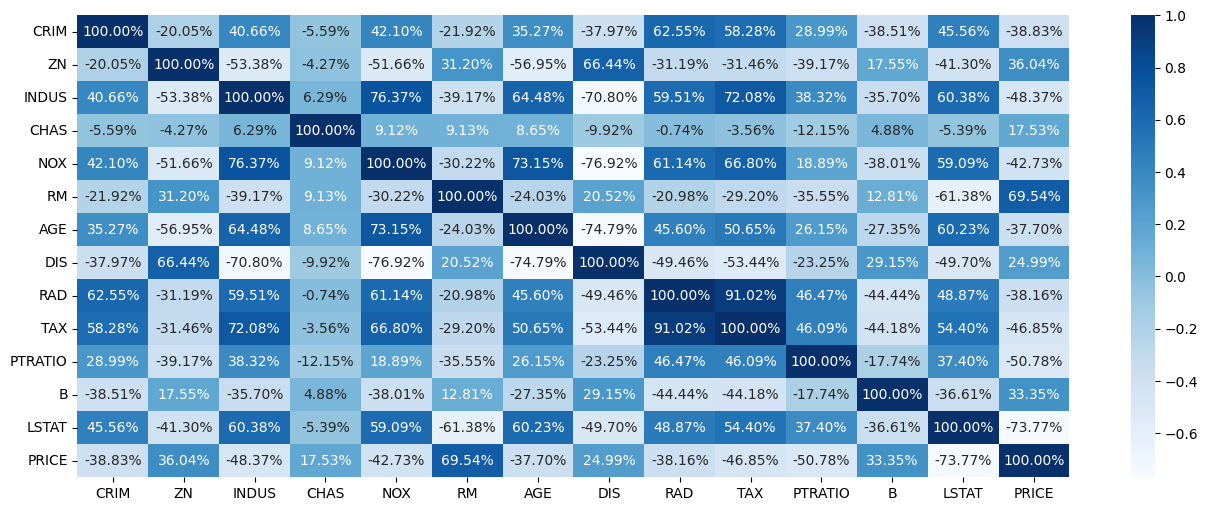

In [8]:
# CORRELATION OF THE DATA
"""
    if corr > 0, then both the data are directly correlated(directly proportional to each other)
    if corr == 0, then both the data are not related
    if corr < 0, then both the data are inversly correlated(inversly proportional to each other) 

    if corr == 1, both the data are perfectly related to each other
    if corr == -1, both the data are perfectly inversly retlated to each other
"""

# then, we find the correlation of the PRICE with the other columns of the dataframe
# DataFrame.corr() -> returns the corrlation between all the columns in the dataframe

plt.subplots(figsize = (16, 6))
sns.heatmap(df.corr(), cmap = 'Blues', annot = True, fmt = '0.2%')
# cmap -> color of the heatmap
# annot -> shows numerical value associated with each cell
# fmt -> formates the 'annot' values to unto 2 decimal places

plt.show()
# in the heatmap you can see that upper half and lower half are same so we only show the lower half by creating a mask for the heatmap

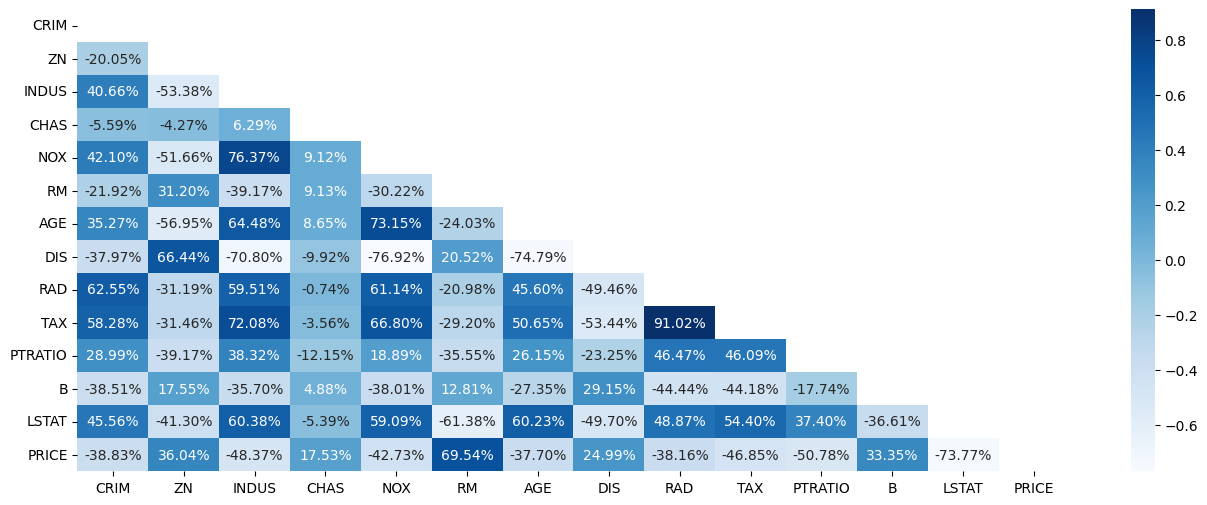

In [9]:
# masked heatmap
plt.subplots(figsize = (16, 6))

# mask for the heatmap
mask = np.triu(np.ones_like(df.corr(), dtype = bool))
# triu() -> creates a numpy array of upper triangle
# np.ones_like() -> creates a numpy array full of ones for a given dimensions.

sns.heatmap(df.corr(), cmap = 'Blues', mask = mask, annot = True, fmt = '0.2%')
# 'mask' attribute creates a mask for each cell.If a masked value for a cell is True, then the cell is not shown else it is shown 

plt.show()


In [10]:
# we will select 'RM' column to predict the 'PRICE' of the houses as it has the highest corelation with the PRICE column(69.54%)

# so, x-axis will be RM and y-axis will be PRICE

X = df['RM']
Y = df['PRICE']

# preparing the X and Y data into required format
X = np.array(X).reshape(-1, 1)
Y = np.array(Y).reshape(-1, 1)

In [11]:
# Now we need to split the data into training, validation and testing.
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20, random_state = 15)
# train_test_split() takes X and Y values and splits the datasets into training and testing sets.
    # the training set is used for training the model and the testing data is used for testing the trained model
    # 'test_size' parameter determines the size of the testing data set. 0.20 means 20% of the data is randomly allocated for testing dataset.
    # 'random_state' parameter sets the seed of random number generator. randomnumber with seed 15 will always returns the same number of random numbers.(this is optional)

In [12]:
y_test.shape

(102, 1)

In [13]:
# TRAINING THE LINEAR REGRESSION MODEL:
linear_reg_model = LinearRegression()
linear_reg_model.fit(x_train , y_train)

LinearRegression()

In [14]:
# PREDICTING A VALUE:
linear_reg_model.predict([[5]])

array([[11.09141239]])

In [18]:
# VALIDATING THE LINEAR REGRESSION MODEL(calculating the error rate using cost function):
y_predicted = linear_reg_model.predict(x_test)

# mean squared error:
"""
    formula : 
        error = 1/n(summation_of(y_actual - y_predicted)**2 )
"""
error = mean_squared_error(y_test, y_predicted)
print("mean squared error = ", error)

# manually calculating the mean squared error : 
# sum = 0
# for i, j in zip(y_test, y_predicted):
#     x = (i - j)**2
#     sum += x
# print(sum/102)

# root mean squared error:
"""
    formula : 
        error = sqrt(1/n(summation_of(y_actual - y_predicted)**2 ) )
"""
rmse_error = np.sqrt(mean_squared_error(y_test , y_predicted))
print("root mean squared error = ",rmse_error)


mean squared error =  35.895117434745075
root mean squared error =  5.991253410993819


In [ ]:
error

35.895117434745075

In [22]:
# LINEAR REGRESSION USING 2 VARIABLES TO PREDICT A VALUE
# here we will use 'RM' and 'LSTAT' columns to determine the prices of the house.

X2 = df[['RM', 'LSTAT']]
Y2 = df['PRICE']

x_train2, x_test2, y_train2, y_test2 = train_test_split(X2, Y2, test_size=0.2, random_state = 45)

lr_2var = LinearRegression()
lr_2var.fit(x_train2, y_train2)


LinearRegression()

In [26]:
# PREDICTING THE VALUES
lr_2var.predict([[6.980,11.66]])
# PREDICT(rm_value, lstat_value)

C:\Users\RAJESH\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([26.53143088])

In [31]:
# VALIDATING THE MODEL:
y_predicted2 = lr_2var.predict(x_test2)

# cost function using mean square error
err = mean_squared_error(y_predicted2, y_test2)
err

38.01716762781534

In [32]:
df.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14,21.6


In [33]:
# LINEAR REGRESSION TO PREDICT 'PRICE' USING ALL THE COLUMNS:
X = df[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']]
Y = df[['PRICE']]

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.8, random_state = 10)
lr = LinearRegression()
lr.fit(x_train, y_train)


LinearRegression()

In [34]:
y_predicted = lr.predict(x_test)

# cost function
error = mean_squared_error(y_test, y_predicted)
error


27.2098966587935